미션에 도전하기 전에 먼저!!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

# 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [2]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [3]:
df_copy = df.copy()

# 연령대코드(5세단위) -> 연령대
df_copy.rename(columns = {'연령대코드(5세단위)':'연령대'}, inplace=True)

# 딕셔너리 value값으로 바꾸기
df_age = df_copy['연령대'].apply(lambda x : age_code[x])

# 결과
df_copy.groupby([df_age])["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [4]:
# 상관계수에 사용할 컬럼을 변수에 담기
columns = [
     '음주여부','흡연상태', '연령대코드(5세단위)', '성별코드'
]
columns

['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

In [5]:
df_corr = df[columns].corr()
df_corr.head()

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


C:\Users\icebu\AppData\Local\Temp\ipykernel_9136\3343009588.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

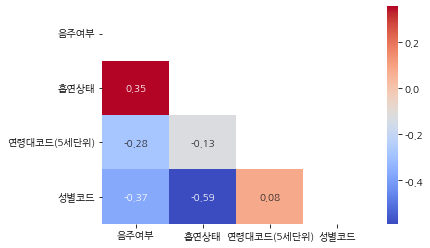

In [6]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_corr, annot=True, fmt=".2f", mask = mask, cmap="coolwarm")

# 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

In [7]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

In [8]:
df_copy = df
df_copy.replace({"음주여부": drink}, inplace=True)
df_copy.replace({"흡연상태": smoke}, inplace=True)

In [9]:
pd2 = pd.crosstab(df_copy.음주여부, df_copy.흡연상태)
pd2

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<AxesSubplot:xlabel='흡연상태', ylabel='count'>

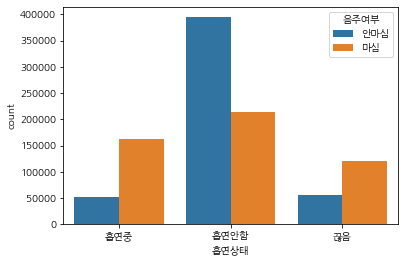

In [10]:
sns.countplot(data = pd2, x = df_copy.흡연상태, hue=df_copy.음주여부)

# 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

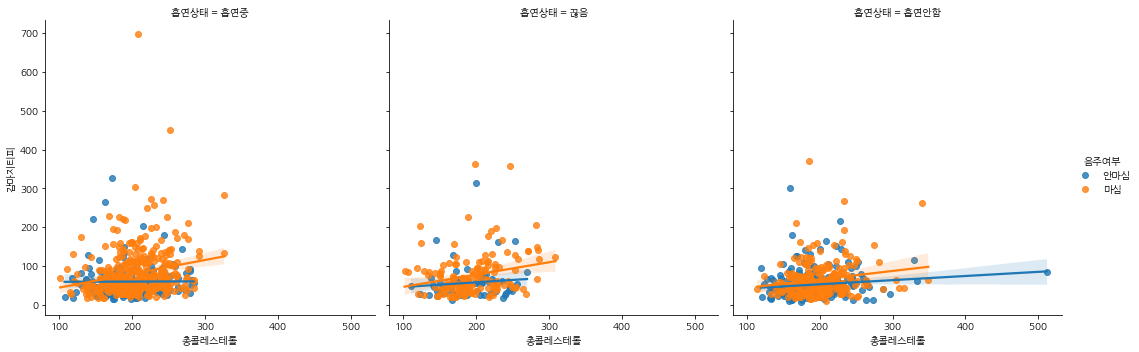

In [11]:
# 체중이 120 Kg 이상인 데이터
df_120 = df[df["체중(5Kg 단위)"] >= 120]

df_120[["총콜레스테롤", "감마지티피"]]

sns.lmplot(data=df_120, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")

# 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
- 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

- 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

- 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

- 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.

<AxesSubplot:xlabel='시력(우)', ylabel='연령대'>

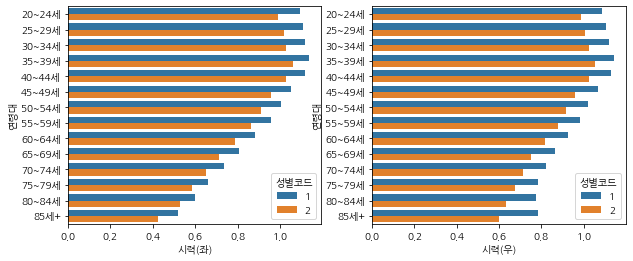

In [12]:
import matplotlib.pyplot as plt

# 실명 데이터 제거하기
eyesight = df_copy["시력(좌)"] != 9.9 
eye_df = df_copy[eyesight]

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

df_age2 = df_age.sort_values()

sns.barplot(data=eye_df, x="시력(좌)", y=df_age2, hue="성별코드", ci = None, ax=ax[0])
sns.barplot(data=eye_df, x="시력(우)", y=df_age2, hue="성별코드", ci = None, ax=ax[1])